# ライブラリのインポート

In [3]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください（今回使わないものも含まれています）
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# matplotlib のインタラクティブサポートを有効化するためのコマンド
%matplotlib inline

# 小数第3位まで表示
%precision 3

'%.3f'

# 練習問題1　

## (1)サイコロを振った時の出る目の数の従う分布を調べましょう．
## (2)サイコロのシミュレーションにおいて，試行回数（サイコロを振る回数）を20回として，乱数の初期値をいろいろと変えた場合の結果を比較してみましょう．
## (3)サイコロのシミュレーションにおいて，試行回数（サイコロを振る回数）を20,50,100,300,500,1000,10000とした場合の確率分布の結果を示してみましょう．



In [5]:
# ランダムシードの固定
np.random.seed(0)

# サイコロがとりうる値を配列に格納
dice_data = np.array([1, 2, 3, 4, 5, 6])

# サイコロを1000回振ってみる
calc_steps = 1000

# 1〜6のデータの中から、1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

# それぞれの数字がどれくらいの割合で抽出されたか計算
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    print(i, 'が出る確率', p)

1 が出る確率 0.171
2 が出る確率 0.157
3 が出る確率 0.157
4 が出る確率 0.183
5 が出る確率 0.161
6 が出る確率 0.171


### グラフに表示

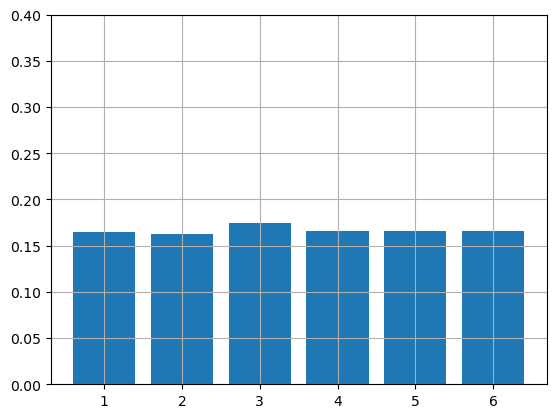

In [6]:
# ランダムシードの固定
np.random.seed(100)

# 一様分布
# サイコロを1000回振ってみる
calc_steps =10000

# 1〜6のデータの中から、1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

# それぞれの数字がどれくらいの割合で抽出されたか計算
prob_data = np.array([])
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls==i]) / calc_steps)

plt.bar(dice_data, prob_data)
plt.ylim(0,0.4)
plt.grid(True)

# 練習問題2

## サイコロを振るシミュレーションにおいて、大数の法則を確認してみましょう．

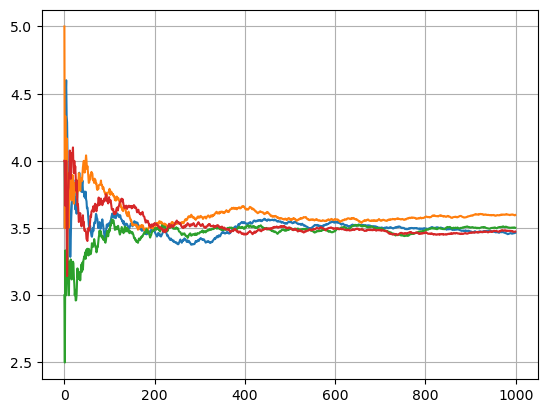

In [9]:
#大数の法則#
# サイコロがとりうる値を配列に格納
dice_data = np.array([1, 2, 3, 4, 5, 6])

# サイコロを振る回数
N = 1000
number_cnt=np.arange(1, N+1)

# 1〜6のデータの中から、N回の抽出を実施
#dice_rolls = np.random.choice(dice_data, N)

# サイコロをN回振ることを４回実施する（４パス）
for i in range(4):
    p = np.random.choice(dice_data, N).cumsum()
    plt.plot(p/number_cnt)
    plt.grid(True)

#  練習問題3
##  サイコロを振ったときの出た目の数の標本平均の分布をシミュレーションし，中心極限定理を確認しましょう．

In [10]:
# 中心極限定理
def function_central_theory(N):

    dice_data = np.array([1, 2, 3, 4, 5, 6])

    mean_array = np.array([])

    for i in range(10000):
        cum_variables = np.random.choice(dice_data, N).cumsum()
        mean_array = np.append(mean_array, cum_variables[N-1] / N)

    plt.hist(mean_array, density=True, bins=100)
    plt.grid(True)

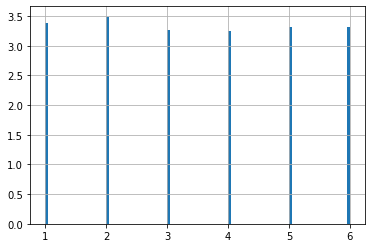

In [ ]:
# N=1
#np.random.seed(123)
function_central_theory(1)

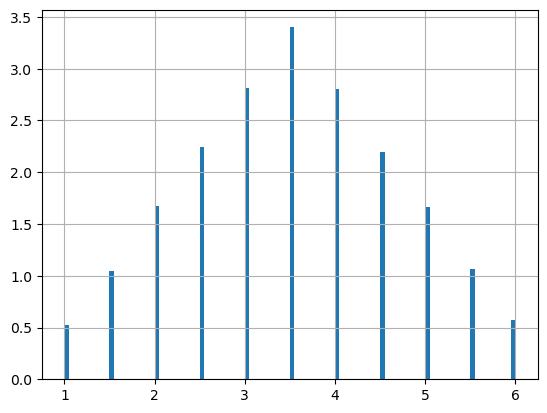

In [11]:
# N=2
#np.random.seed(123)
function_central_theory(2)

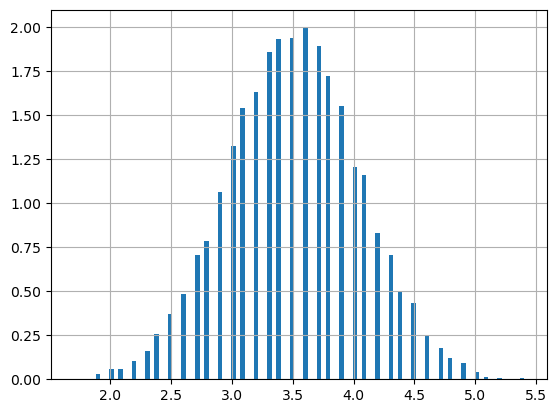

In [16]:
# N=10
#np.random.seed(123)
function_central_theory(10)

# 練習問題4

##  （１）正規分布に従う乱数を発生させ，ヒストグラムを描いてみましょう．


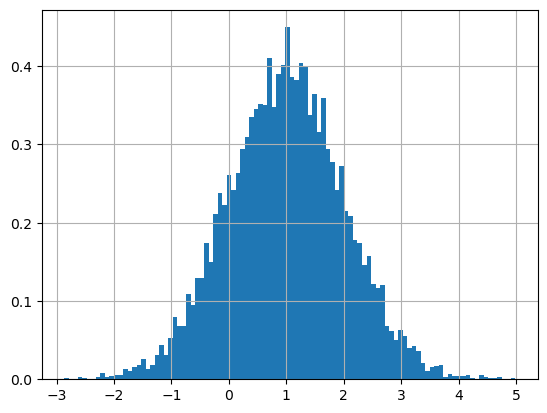

In [4]:
# 正規分布
# np.random.normal(平均、標準偏差、サンプル数)
x= np.random.normal(1, 1, 10000)

#ヒストグラムの表示（density=Trueで正規化，bins=ビンの個数）
plt.hist(x, density=True, bins=100)
plt.grid(True)


##  （２）平均０，分散１の正規分布からN=100の標本抽出をM回繰り返して，標本平均の標本分布(ヒストグラム）を描いてみましょう．


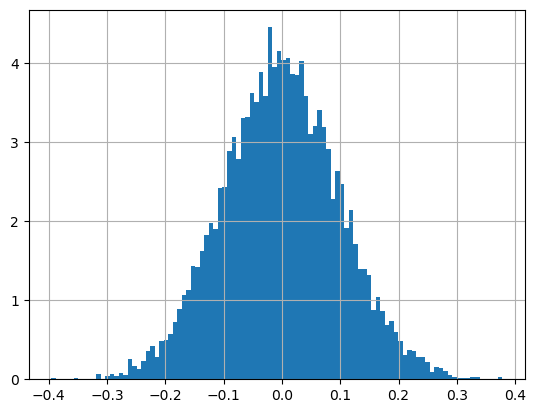

In [19]:
M = 10000
#平均０，分散１の正規分布からN=100の標本抽出をM回行う
normal_sample_data = [np.random.normal(0, 1, 100).mean() for _ in range(M)]

plt.hist(normal_sample_data, density=True, bins=100 )
plt.grid(True)
